# **LOAD DATA**

In [2]:
import pandas as pd
data = pd.read_csv('weatherAUS.csv')

In [3]:
pd.set_option('Display.max_columns',None)

# **DATA EXPLORATION**

We will check the no. of rows and columns first. Then we will check the size of data set to decide whether it requires any compression of size.

In [4]:
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       NaN     16.9     21.8        No           No  
1       NaN     17.2     24.3        No           No  
2       2.0     21.0     23.2        No           No  
3       NaN     18.1     26.5        No           No  
4       8.0     17.8     29.7        No           No

In [5]:
data.shape

(145460, 23)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
data['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
data['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

"RainToday" and "RainTomorrow" are categorical object (Yes/No). We will convert them into binary (1/0) for our convenience.

In [8]:
X=data.drop(columns=['RainTomorrow']);
y=data['RainTomorrow'];

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)

In [9]:
trainData = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)

In [10]:
trainData.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Now we will find out if the data available with us is imbalanaced or not. If the dataset is imbalanced, we need to undersample majority or oversample minority to balance it. But we will prefer oversampling the minoority class because data size is not too big and we cannot afford loding information from the data.

In [11]:
import matplotlib.pyplot as plt

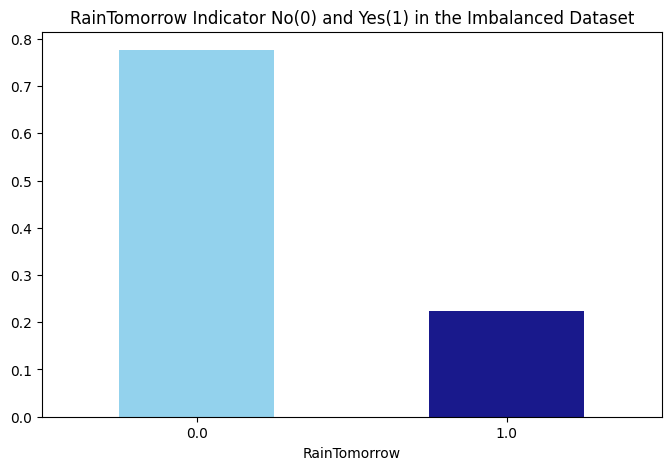

In [13]:
fig = plt.figure(figsize = (8,5))
trainData.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

We can observe that presence of "0" and "1" are almost in the ratio 78:22. So there is a class imbalance and we have to handle it. For tackling class imbalance, we will use **oversampling of minority class** here. Since the size of the data set is quite small, undersampling of majority class would not make much sense here.

In [14]:
from sklearn.utils import resample

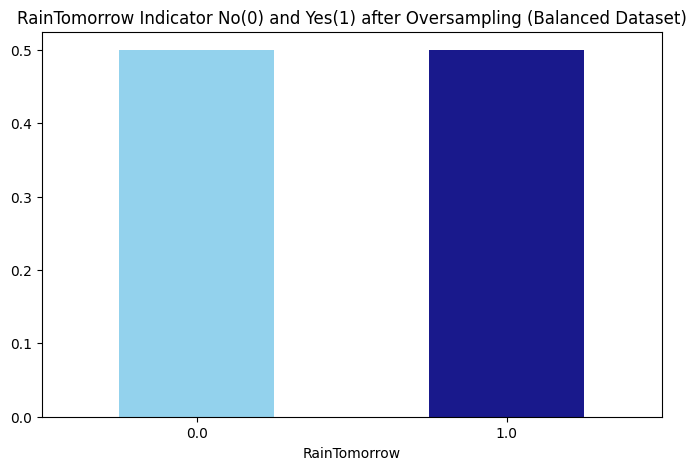

In [15]:
no = trainData[trainData.RainTomorrow == 0]
yes = trainData[trainData.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=369)
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))
oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()

Now we start the analysis for the missing data.

<Axes: >

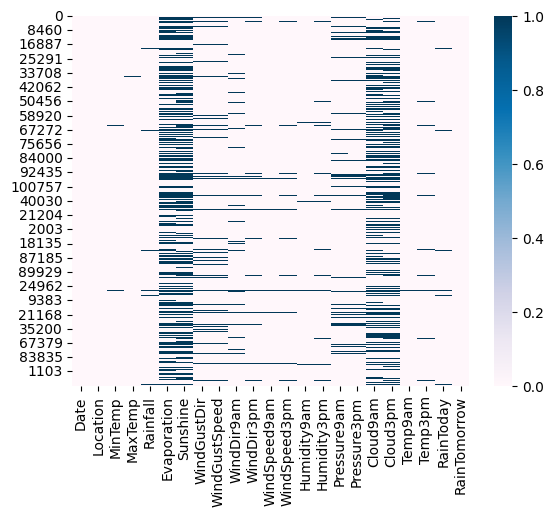

In [16]:
# Missing Data Pattern in Data
import seaborn as sns
sns.heatmap(oversampled.isnull(), cbar=True, cmap='PuBu')

In [17]:
total = oversampled.isnull().sum().sort_values(ascending=False)
percent = (oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4)

Total   Percent
Sunshine     78812  0.475929
Evaporation  71376  0.431025
Cloud3pm     64156  0.387425
Cloud9am     60949  0.368058

###We observe that all 4 features have <50% missing data. So instead of completely discarding them, we will consider them in our model with proper imputation.

# Imputation and Transformation
We will start by imputing categorical columns with the mode, then apply a label encoder to convert these columns into numeric values. After all the columns in the oversampled dataframe have been converted to numeric, we will address any missing values using the MICE package (Multiple Imputation by Chained Equations). Following this, we will identify and remove outliers using the Inter-Quartile Range (IQR) method to create the final dataset. Lastly, we'll examine the correlation among the variables, and if we find any pairs with high correlation, we will remove one of the correlated variables.

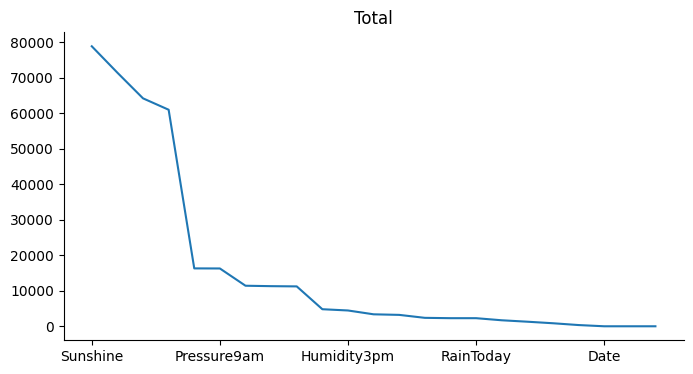

In [18]:
from matplotlib import pyplot as plt
missing['Total'].plot(kind='line', figsize=(8, 4), title='Total')
plt.gca().spines[['top', 'right']].set_visible(False)

In [19]:
oversampled.select_dtypes(include=['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [20]:
# Impute categorical var with Mode
oversampled['Date'] = oversampled['Date'].fillna(oversampled['Date'].mode()[0])
oversampled['Location'] = oversampled['Location'].fillna(oversampled['Location'].mode()[0])
oversampled['WindGustDir'] = oversampled['WindGustDir'].fillna(oversampled['WindGustDir'].mode()[0])
oversampled['WindDir9am'] = oversampled['WindDir9am'].fillna(oversampled['WindDir9am'].mode()[0])
oversampled['WindDir3pm'] = oversampled['WindDir3pm'].fillna(oversampled['WindDir3pm'].mode()[0])

In [21]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in oversampled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversampled[col] = lencoders[col].fit_transform(oversampled[col])

In [22]:
import warnings
warnings.filterwarnings("ignore")

In [23]:
# Multiple Imputation by Chained Equations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = oversampled.copy(deep=True)
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(oversampled)

In [24]:
MiceImputed.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

The dataframe now does not have any "NaN" value. We will now detect and discard the outliers from data set based on Inter-Quartile Range.

In [25]:
# Detecting outliers with IQR
Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Date             1539.000000
Location           25.000000
MinTemp             9.300000
MaxTemp            10.200000
Rainfall            2.400000
Evaporation         4.165315
Sunshine            5.939802
WindGustDir         9.000000
WindGustSpeed      19.000000
WindDir9am          8.000000
WindDir3pm          8.000000
WindSpeed9am       13.000000
WindSpeed3pm       11.000000
Humidity9am        26.000000
Humidity3pm        30.041693
Pressure9am         8.700000
Pressure3pm         8.700000
Cloud9am            4.000000
Cloud3pm            3.714639
Temp9am             9.200000
Temp3pm             9.756591
RainToday           1.000000
RainTomorrow        1.000000
dtype: float64


In [26]:
# Removing outliers from dataset
MiceImputed = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputed.shape

(127756, 23)

Initially the sahpe of the dataset was (87927, 24). After running outlier-removal code snippet, the dataset is now having the shape (86065, 24). So, the dataset is now free of 1862 outliers. We will now check for multi-collinearity i.e. whether any feature is highly correlated with another.

<Axes: >

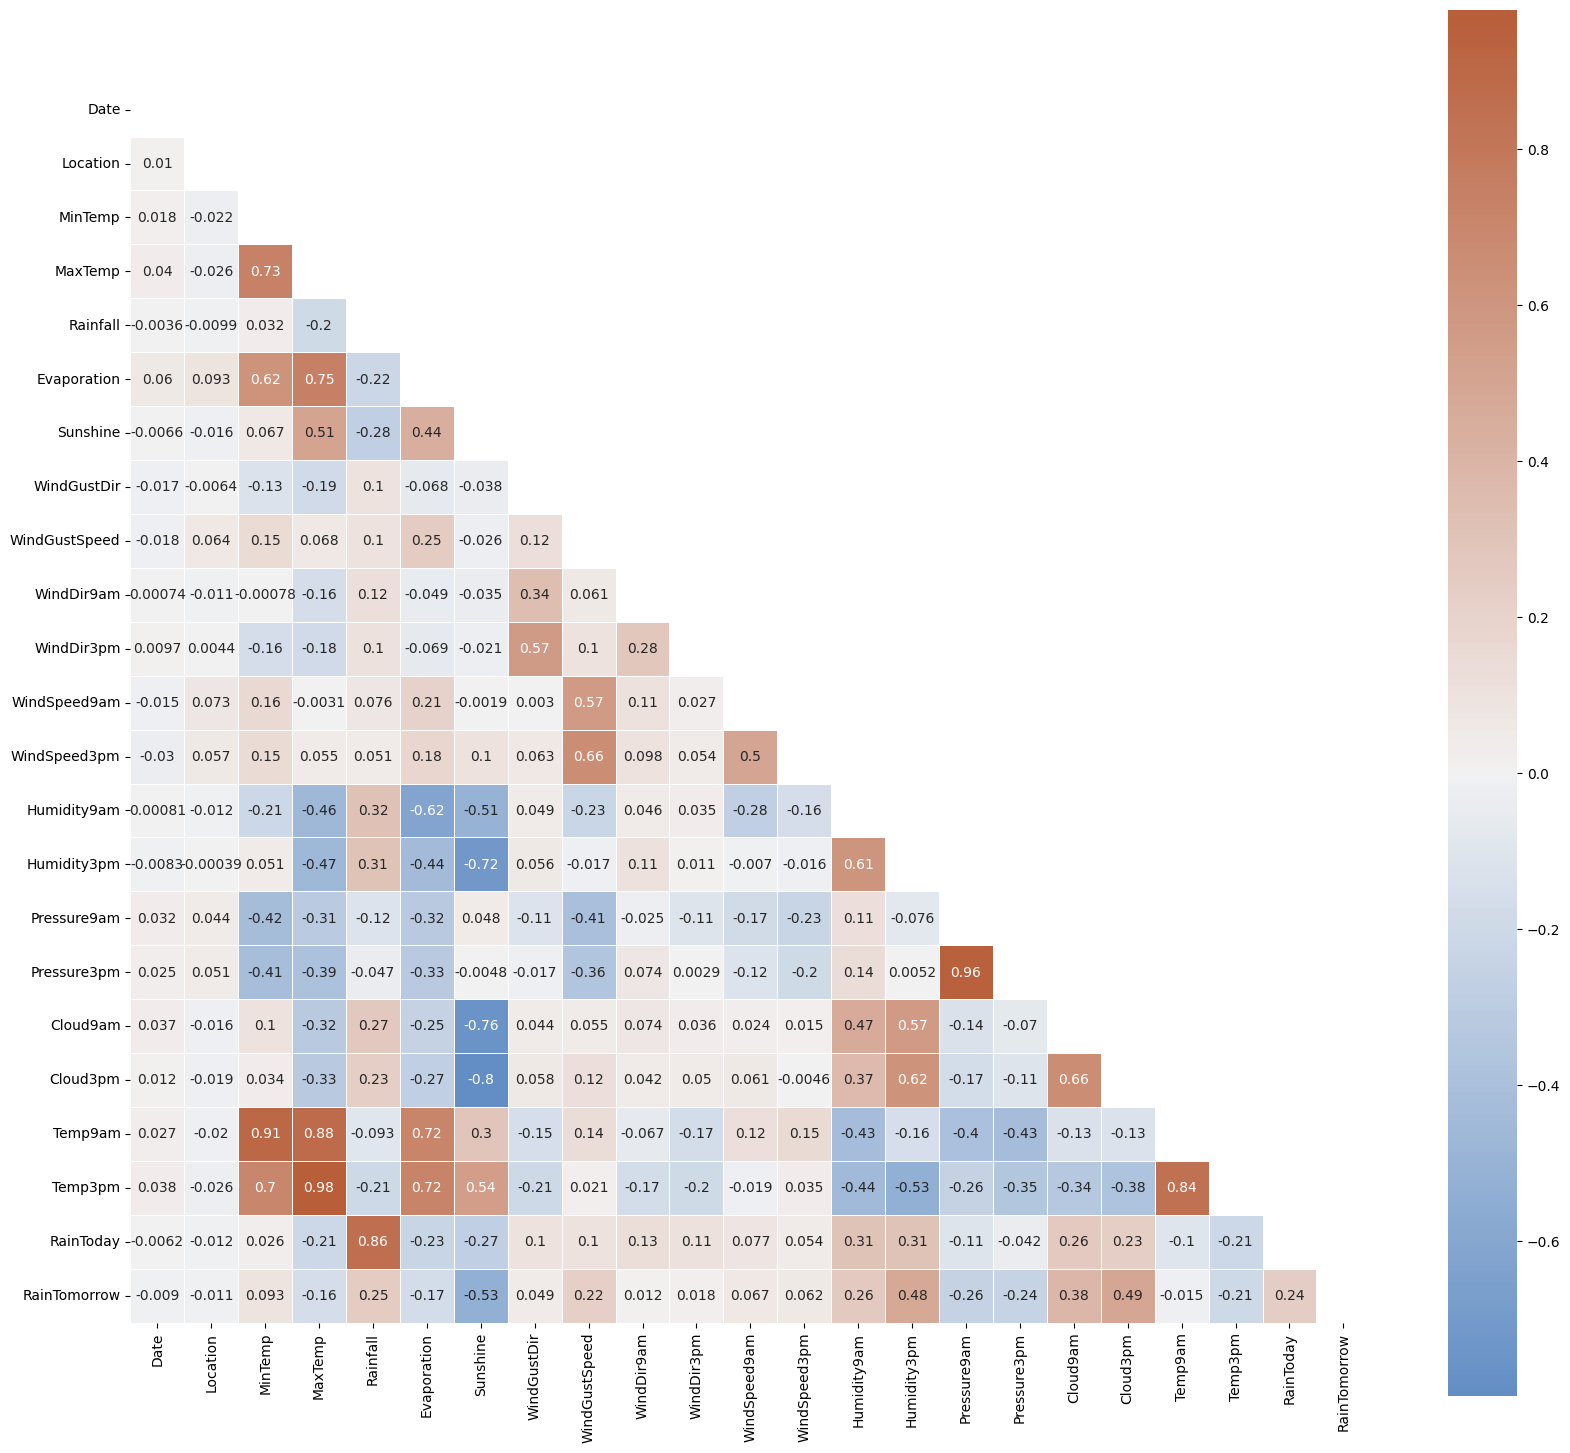

In [27]:
# Correlation Heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = MiceImputed.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

The following pairs of features are having high correlation between them:

* MaxTemp and MinTemp
* Pressure9am and Pressure3pm
* Temp9am and Temp3pm
* Evaporation and MaxTemp
* MaxTemp and Temp3pm
But in no case, the correlation value is equal to a perfect "1". So we are not discarding any feature.

However, we can dig deeper into pairwise correlation among these highly correlated features by looking at the following pairplot. Each of the pairplots shows very clearly distinguishable clusters of RainTomorrow "yes" and "no". There is very minimal overlap between them.

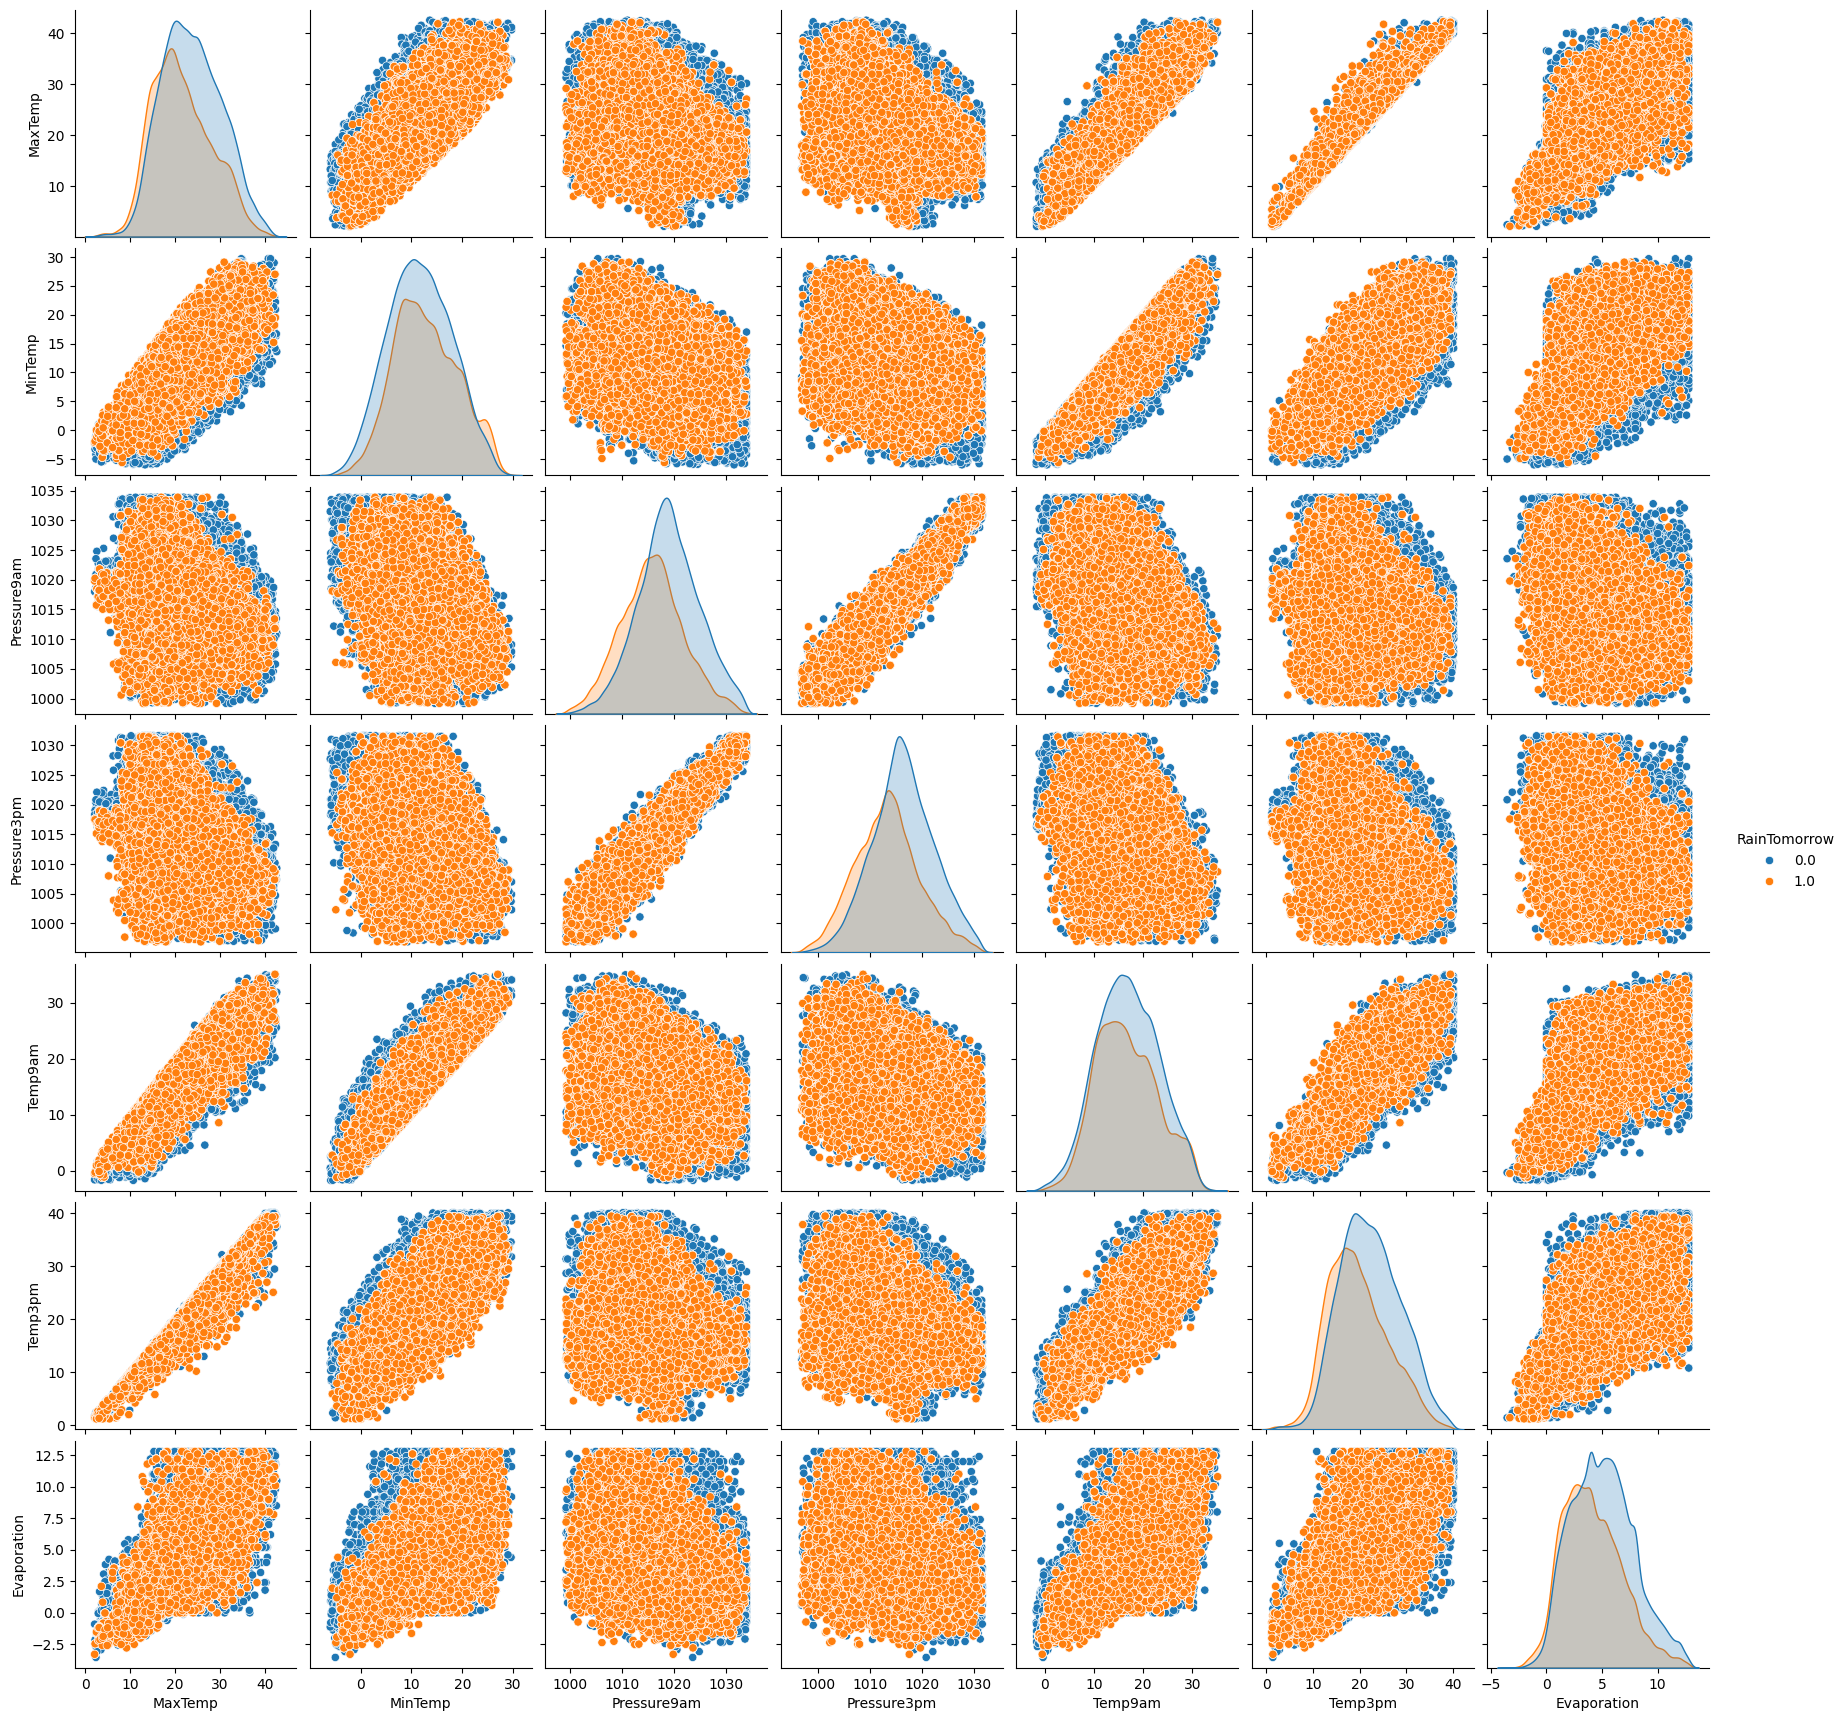

In [ ]:
sns.pairplot( data=MiceImputed, vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm', 'Temp9am', 'Temp3pm', 'Evaporation'), hue='RainTomorrow' )

# Feature Selection
We will use both filter method and wrapper method for feature selection.

**(1) Feature Selection by Filter Method (Chi-Square Value):** Before performing this, we need to standardize our data first. We are using MinMaxScaler instead of StandardScaler in order to avoid negative values.


# **FEATURE SELECTION**



In [28]:
# Standardizing data
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(MiceImputed)
modified_data = pd.DataFrame(r_scaler.transform(MiceImputed), index=MiceImputed.index, columns=MiceImputed.columns)
modified_data.head()

Date  Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
2  0.736594  0.791667  0.700280  0.686420  0.853800     0.546660  0.518025   
3  0.645551  0.562500  0.686275  0.525926  0.373428     0.669002  0.621171   
4  0.698291  0.312500  0.274510  0.362963  0.373428     0.338679  0.695664   
5  0.776959  0.916667  0.456583  0.367901  0.373428     0.387616  0.598249   
6  0.194166  0.562500  0.602241  0.429630  0.394314     0.509957  0.712855   

   WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  \
2     0.266667       0.732394    0.733333    0.066667      0.153846   
3     0.000000       0.605634    0.133333    0.133333      0.666667   
4     0.200000       0.267606    0.200000    0.666667      0.333333   
5     0.400000       0.549296    0.400000    0.466667      0.487179   
6     0.800000       0.507042    0.800000    0.733333      0.717949   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
2      0.794872     0.745623     0.646465     0.319885     0.242075  0.687533   
3      0.666667     0.497082     0.646465     0.610951     0.616715  0.687533   
4      0.282051     0.474487     0.373737     0.752161     0.766571  0.253883   
5      0.564103     0.542271     0.484848     0.619597     0.561960  0.253883   
6      0.615385     0.338920     0.505051     0.585014     0.605187  0.340613   

   Cloud3pm   Temp9am   Temp3pm  RainToday  RainTomorrow  
2  0.433228  0.625000  0.657796   1.000000           0.0  
3  0.606519  0.614130  0.542230   0.249521           0.0  
4  0.606519  0.307065  0.362461   0.249521           0.0  
5  0.433228  0.372283  0.367597   0.249521           0.0  
6  0.086646  0.527174  0.442073   0.249521           0.0

In [29]:
# Feature Importance using Filter Method (Chi-Square)
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='RainTomorrow']
y = modified_data[['RainTomorrow']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday'],
      dtype='object')


We can observe that "Sunshine", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm" are having higher importance compared to other features.

**(2) Feature Selection by Wrapper Method (Random Forest):**

In [37]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = MiceImputed.drop('RainTomorrow', axis=1)
y = MiceImputed['RainTomorrow']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Sunshine', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm']
[0.03263667 0.02852916 0.03393067 0.0330199  0.02286847 0.03326609
 0.13199918 0.02129965 0.04318316 0.02187847 0.02187235 0.02192033
 0.02414738 0.03438553 0.11462933 0.04797271 0.06129549 0.05436397
 0.13821095 0.03200021 0.03565771 0.01093263]


# TEST AND TRAIN SET PREPARATION

In [31]:
features = MiceImputed[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir',
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
                       'RainToday']]
target = MiceImputed['RainTomorrow']

In [32]:
X_train=features
y_train=target.squeeze()

Processing the test data to remove the null values present in it through MICE Imputation technique

In [33]:
testData = pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)

In [34]:
testData.shape

(36365, 23)

In [35]:
testData.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [36]:
testData.isna().sum()

Date                 0
Location             0
MinTemp            389
MaxTemp            325
Rainfall           832
Evaporation      15732
Sunshine         17391
WindGustDir       2634
WindGustSpeed     2621
WindDir9am        2608
WindDir3pm        1106
WindSpeed9am       427
WindSpeed3pm       805
Humidity9am        681
Humidity3pm       1206
Pressure9am       3794
Pressure3pm       3790
Cloud9am         13891
Cloud3pm         14804
Temp9am            440
Temp3pm            965
RainToday          832
RainTomorrow       828
dtype: int64

TEST SET PREPARATION

In [38]:
testData.select_dtypes(include=['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [39]:
# Impute categorical var with Mode
testData['Date'] = testData['Date'].fillna(testData['Date'].mode()[0])
testData['Location'] = testData['Location'].fillna(testData['Location'].mode()[0])
testData['WindGustDir'] = testData['WindGustDir'].fillna(testData['WindGustDir'].mode()[0])
testData['WindDir9am'] = testData['WindDir9am'].fillna(testData['WindDir9am'].mode()[0])
testData['WindDir3pm'] = testData['WindDir3pm'].fillna(testData['WindDir3pm'].mode()[0])

In [40]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in testData.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    testData[col] = lencoders[col].fit_transform(testData[col])

In [41]:
import warnings
warnings.filterwarnings("ignore")

In [42]:
# Multiple Imputation by Chained Equations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = testData.copy(deep=True)
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(testData)

In [43]:
MiceImputed.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [44]:
X_train.shape

(127756, 21)

In [45]:
type(y_train)

pandas.core.series.Series

In [46]:
y_train.shape

(127756,)

In [47]:
testData.shape

(36365, 23)

In [48]:
X_test=MiceImputed.drop(columns=['Date','RainTomorrow'])
y_test=MiceImputed['RainTomorrow']

In [49]:
type(y_test)

pandas.core.series.Series

In [50]:
X_test.shape

(36365, 21)

In [51]:
y_test.shape

(36365,)

In [52]:
X_train.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
2        38     19.0     29.9       4.6          5.4       7.5            4   
3        27     18.5     23.4       0.0          7.4       9.3            0   
4        15      3.8     16.8       0.0          2.0      10.6            3   
5        44     10.3     17.0       0.0          2.8       8.9            6   
6        27     15.5     19.5       0.2          4.8      10.9           12   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
2           59.0          11           1           6.0          31.0   
3           50.0           2           2          26.0          26.0   
4           26.0           3          10          13.0          11.0   
5           46.0           6           7          19.0          22.0   
6           43.0          12          11          28.0          24.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
2         88.0         65.0       1010.3       1005.3       6.0       5.0   
3         66.0         65.0       1020.4       1018.3       6.0       7.0   
4         64.0         38.0       1025.3       1023.5       1.0       7.0   
5         70.0         49.0       1020.7       1016.4       1.0       5.0   
6         52.0         51.0       1019.5       1017.9       2.0       1.0   

   Temp9am  Temp3pm  RainToday  
2     21.3     26.8        1.0  
3     20.9     22.3        0.0  
4      9.6     15.3        0.0  
5     12.0     15.5        0.0  
6     17.7     18.4        0.0

In [53]:
has_negative_values = (X_train < 0).any().any()

if has_negative_values:
    print("The DataFrame contains negative values.")
else:
    print("The DataFrame does not contain any negative values.")

The DataFrame contains negative values.


In [54]:
X_test

Location  MinTemp  MaxTemp  Rainfall  Evaporation   Sunshine  \
0            23     -4.6     -1.5       1.8    -3.056903   1.066587   
1             3     13.4     34.3       0.0     9.200000  11.700000   
2             6     -0.6     13.4       0.2    -0.556199   5.438994   
3            27     17.8     24.1       2.0     5.400000   7.500000   
4            14     15.4     24.8       0.2     4.052722   7.557150   
...         ...      ...      ...       ...          ...        ...   
36360        39     25.3     31.2       2.2     6.800000   3.600000   
36361         4      8.0     21.9       0.2     3.340820   8.599854   
36362        33      6.2     15.7       0.0     3.028728   2.439755   
36363        42     14.4     24.4       3.6     1.000000   9.900000   
36364        38     17.7     28.0       0.0     5.600000   8.400000   

       WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  \
0               15           63.0          15          13          24.0   
1                2           41.0           1           2           2.0   
2                4           20.0           3           7           0.0   
3                9           35.0           9           9          11.0   
4                5           30.0          14           5          11.0   
...            ...            ...         ...         ...           ...   
36360            4           39.0           1           5          15.0   
36361            1           30.0          15           9           7.0   
36362           15           50.0           3           3          19.0   
36363            4           26.0           2           9          11.0   
36364            5           57.0           7           4          13.0   

       WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0              19.0         95.0         97.0  1019.506755  1020.408136   
1              26.0         22.0          7.0  1013.200000  1008.800000   
2              11.0         88.0         58.0  1032.400000  1030.100000   
3              19.0         86.0         65.0  1018.000000  1015.300000   
4              24.0         81.0         70.0  1024.000000  1020.500000   
...             ...          ...          ...          ...          ...   
36360          17.0         85.0         89.0  1006.800000  1004.100000   
36361           7.0         75.0         40.0  1025.800000  1023.000000   
36362          20.0         74.0         85.0  1004.700000  1002.600000   
36363           7.0         71.0         47.0  1022.200000  1020.300000   
36364          28.0         71.0         49.0  1017.900000  1014.800000   

       Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  
0      7.257030  7.643988     -3.2     -2.2        1.0  
1      0.000000  1.000000     25.9     33.8        0.0  
2      4.858292  6.000000      6.6     12.9        0.0  
3      6.000000  7.000000     20.3     23.0        1.0  
4      4.760398  4.443008     20.2     23.0        0.0  
...         ...       ...      ...      ...        ...  
36360  7.000000  7.000000     28.1     27.1        1.0  
36361  3.234239  3.524974     14.7     20.4        0.0  
36362  7.000000  8.000000     11.4     13.4        0.0  
36363  1.000000  3.000000     18.2     23.9        1.0  
36364  1.000000  6.000000     21.4     27.0        0.0  

[36365 rows x 21 columns]

In [55]:
y_test=y_test.astype(int)

In [56]:
y_train=y_train.astype(int)

In [57]:
y_train.dtypes

dtype('int64')

Testing and Traing Data are now prepared and we are going to use this training data to train our model and then evaluate the model performance using testing data.

# **MODEL TRAINING BEGINS**

In [58]:
# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
def plot_roc_cur(fper, tper):
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [60]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, roc_curve, classification_report, ConfusionMatrixDisplay

In [61]:
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))

    probs = model.predict_proba(X_test)
    probs = probs[:, 1]
    fper, tper, thresholds = roc_curve(y_test, probs)
    plot_roc_cur(fper, tper)

    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')

    return model, accuracy, roc_auc, time_taken

**Model 1: Decision Tree**

Accuracy = 0.8037948576928365
ROC Area under Curve = 0.7454455136449476
Time taken = 0.5043351650238037
              precision    recall  f1-score   support

           0    0.89317   0.84989   0.87099     28340
           1    0.54735   0.64100   0.59048      8025

    accuracy                        0.80379     36365
   macro avg    0.72026   0.74545   0.73074     36365
weighted avg    0.81685   0.80379   0.80909     36365



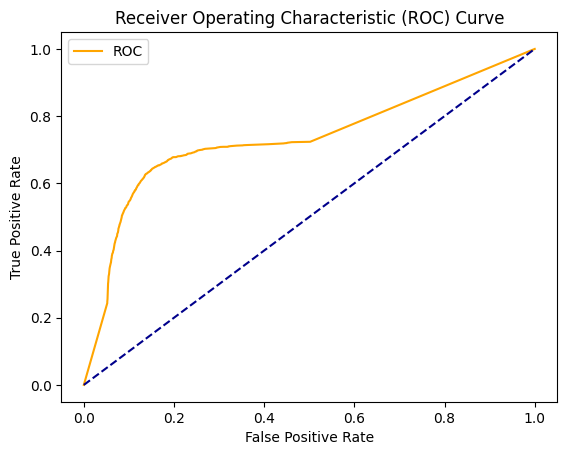

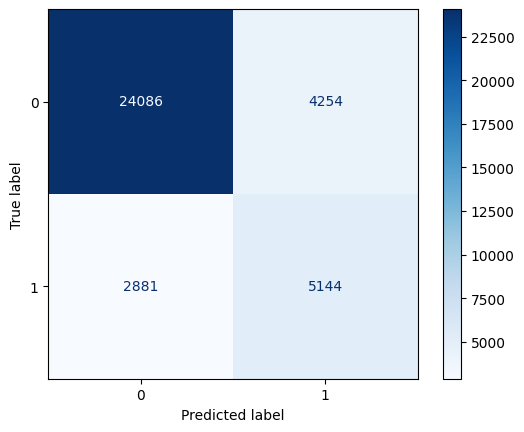

In [68]:
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

**Model 2: Neural Network (Multilayer Perceptron)**

Accuracy = 0.8463357624089096
ROC Area under Curve = 0.850674959382839
Time taken = 346.63975381851196
              precision    recall  f1-score   support

           0    0.95460   0.84291   0.89529     28340
           1    0.60744   0.85844   0.71145      8025

    accuracy                        0.84634     36365
   macro avg    0.78102   0.85067   0.80337     36365
weighted avg    0.87799   0.84634   0.85472     36365



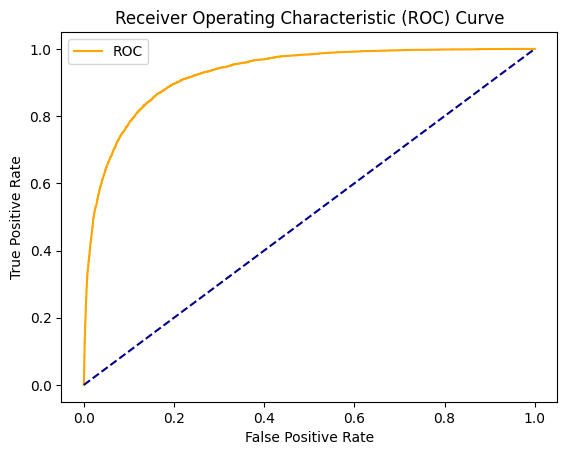

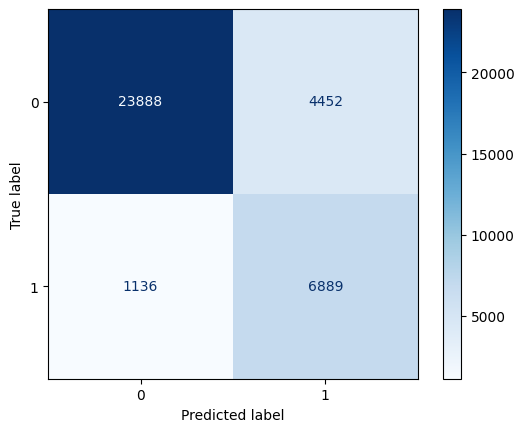

In [69]:
from sklearn.neural_network import MLPClassifier

params_nn = {'hidden_layer_sizes': (30,30,30),
             'activation': 'logistic',
             'solver': 'lbfgs',
             'max_iter': 500}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)

**Model 3: Random Forest**

Accuracy = 0.8653650488106696
ROC Area under Curve = 0.810584194593026
Time taken = 37.96038031578064
              precision    recall  f1-score   support

           0    0.91778   0.90865   0.91319     28340
           1    0.68834   0.71252   0.70022      8025

    accuracy                        0.86537     36365
   macro avg    0.80306   0.81058   0.80670     36365
weighted avg    0.86714   0.86537   0.86619     36365



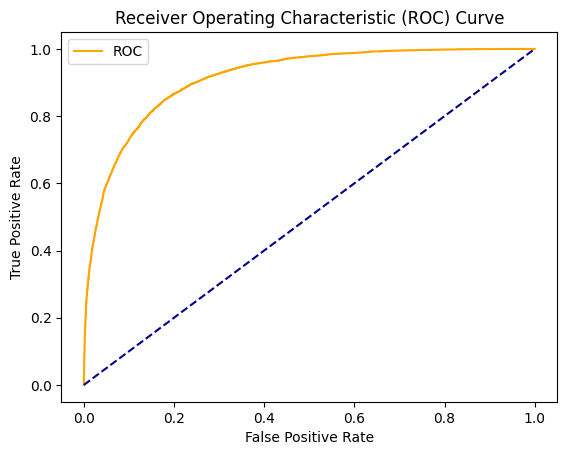

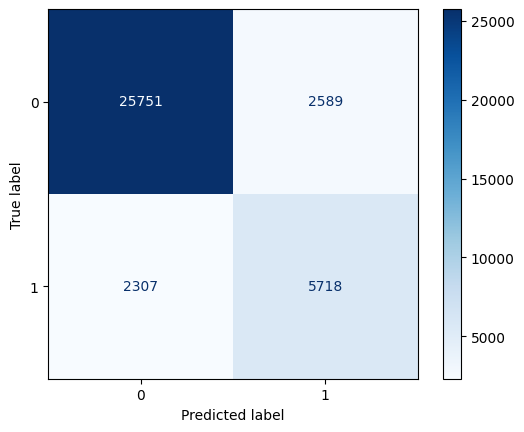

In [70]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

**Model-4: Light GBM**

[LightGBM] [Info] Number of positive: 55910, number of negative: 71846
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008630 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4330
[LightGBM] [Info] Number of data points in the train set: 127756, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437631 -> initscore=-0.250782
[LightGBM] [Info] Start training from score -0.250782
Accuracy = 0.853485494293964
ROC Area under Curve = 0.8466869367735355
Time taken = 7.364191770553589
              precision    recall  f1-score   support

           0    0.94826   0.85886   0.90135     28340
           1    0.62606   0.83452   0.71542      8025

    accuracy                        0.85349     36365
   macro avg    0.78716   0.84669   0.80838     36365
weighted avg    0.87716   0.85349   0.86032     36365



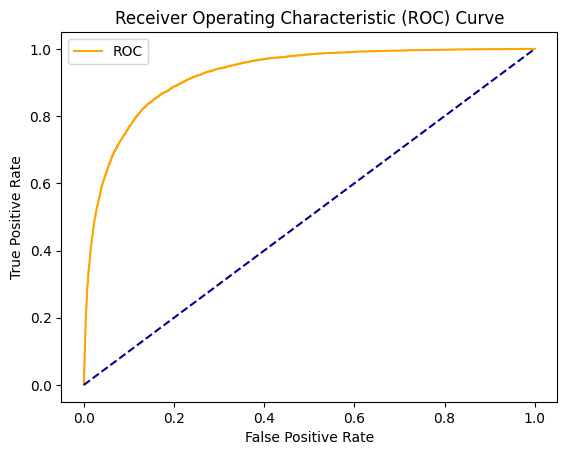

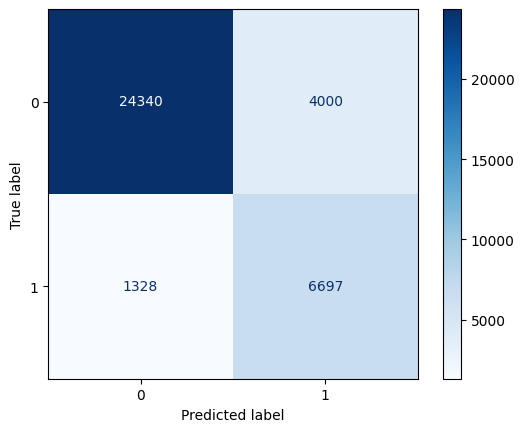

In [71]:
import lightgbm as lgb
params_lgb ={'colsample_bytree': 0.95,
         'max_depth': 16,
         'min_split_gain': 0.1,
         'n_estimators': 200,
         'num_leaves': 50,
         'reg_alpha': 1.2,
         'reg_lambda': 1.2,
         'subsample': 0.95,
         'subsample_freq': 20}

model_lgb = lgb.LGBMClassifier(**params_lgb)
model_lgb, accuracy_lgb, roc_auc_lgb, tt_lgb = run_model(model_lgb, X_train, y_train, X_test, y_test)

**Model-5: CatBoost**

In [72]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.0 MB/s eta 0:00:00


Accuracy = 0.8641000962463907
ROC Area under Curve = 0.7986070237459244
Time taken = 437.5651841163635
              precision    recall  f1-score   support

           0    0.91032   0.91584   0.91307     28340
           1    0.69629   0.68137   0.68875      8025

    accuracy                        0.86410     36365
   macro avg    0.80331   0.79861   0.80091     36365
weighted avg    0.86309   0.86410   0.86357     36365



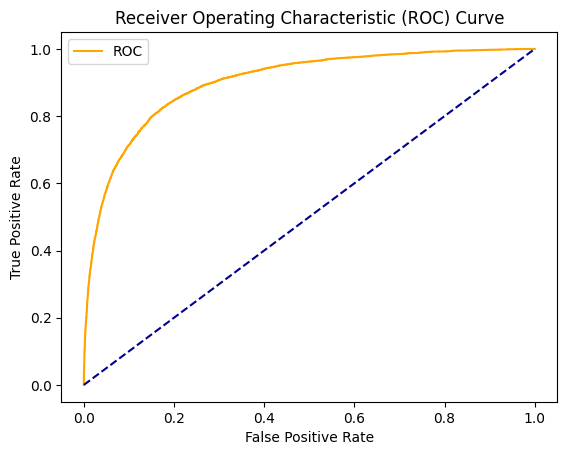

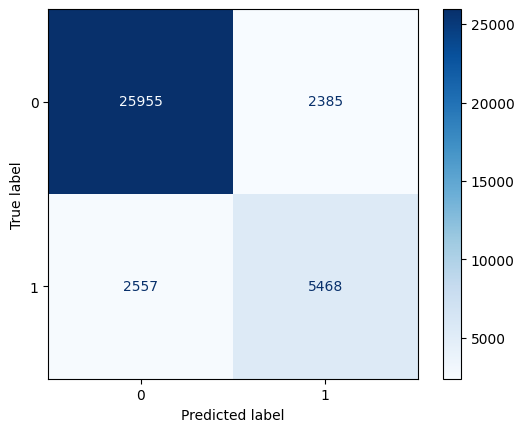

In [73]:
import catboost as cb

params_cb = {'iterations': 50,
             'max_depth': 16}

model_cb = cb.CatBoostClassifier(**params_cb)
model_cb, accuracy_cb, roc_auc_cb, tt_cb = run_model(model_cb, X_train, y_train, X_test, y_test, verbose=False)


**Model-6: XGBoost**

Accuracy = 0.8877492094046473
ROC Area under Curve = 0.8226677395313252
Time taken = 56.69292855262756
              precision    recall  f1-score   support

           0    0.91862   0.93917   0.92878     28340
           1    0.76674   0.70617   0.73521      8025

    accuracy                        0.88775     36365
   macro avg    0.84268   0.82267   0.83199     36365
weighted avg    0.88510   0.88775   0.88606     36365



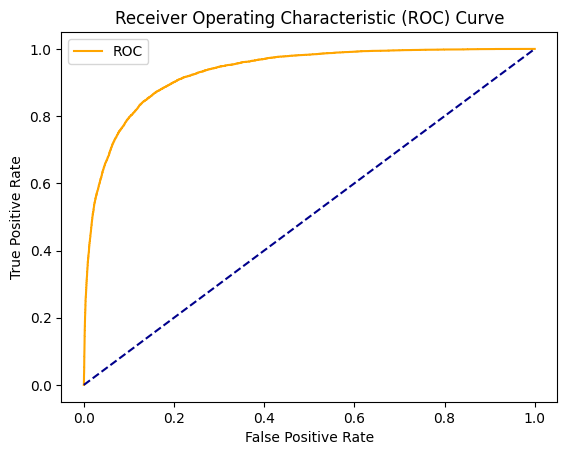

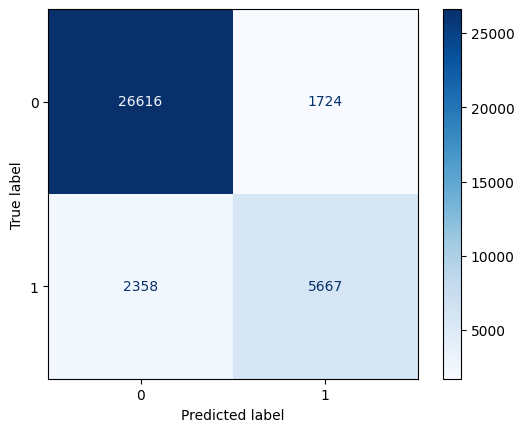

In [74]:
import xgboost as xgb
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

# Plotting Decision Region for all Models

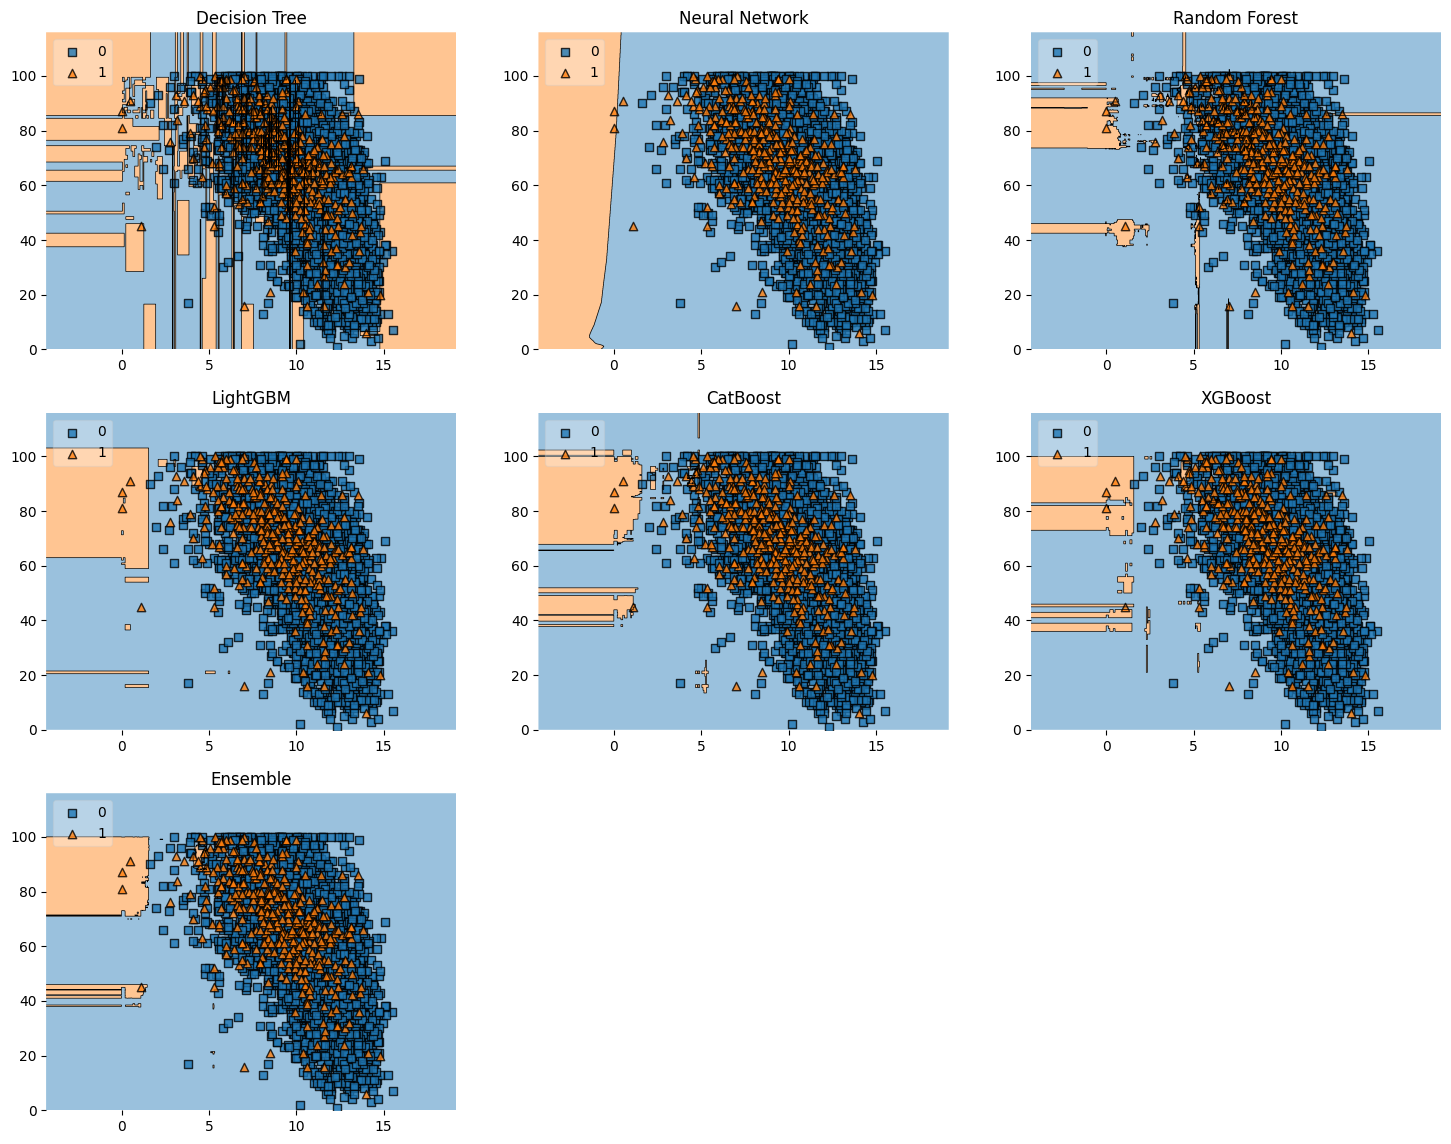

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import catboost as cb
import xgboost as xgb
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions

value = 1.80
width = 0.90

clf2 = DecisionTreeClassifier(random_state=12345)
clf3 = MLPClassifier(random_state=12345, verbose = 0)
clf4 = RandomForestClassifier(random_state=12345)
clf5 = lgb.LGBMClassifier(random_state=12345, verbose = 0)
clf6 = cb.CatBoostClassifier(random_state=12345, verbose = 0)
clf7 = xgb.XGBClassifier(random_state=12345)
eclf = EnsembleVoteClassifier(clfs=[clf4, clf5, clf6, clf7], weights=[1, 1, 1, 1], voting='soft')

X_list = MiceImputed[["Sunshine", "Humidity9am", "Cloud3pm"]] #took only really important features
X = np.asarray(X_list, dtype=np.float32)
y_list = MiceImputed["RainTomorrow"]
y = np.asarray(y_list, dtype=np.int32)

# Plotting Decision Regions
gs = gridspec.GridSpec(3,3)
fig = plt.figure(figsize=(18, 14))

labels = ['Decision Tree',
          'Neural Network',
          'Random Forest',
          'LightGBM',
          'CatBoost',
          'XGBoost',
          'Ensemble']

for clf, lab, grd in zip([clf2, clf3, clf4, clf5, clf6, clf7, eclf],
                         labels,
                         itertools.product([0, 1, 2],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf,
                                filler_feature_values={2: value},
                                filler_feature_ranges={2: width},
                                legend=2)
    plt.title(lab)

plt.show()

We can observe the difference in class boundaries for different models including the *ensemble* one (plotting is done considering the training data only). CatBoost has the distinct regional boundary compared to all other models. However, XGBoost and Random Forest models are also having very lesser number of misclassified data points as compared to other models.

# Model Comparison

Now, we need to decide which model has performed the best based on accuracy score, ROC_AUC and total time taken for execution. A mentionable point here is: we could have considered F1-Score as a better metric to judge model performance instead of accuracy, but we already converted the imbalanced data set to a balanced one, so considering accuracy as a metric to decide the best model is justified in this case.

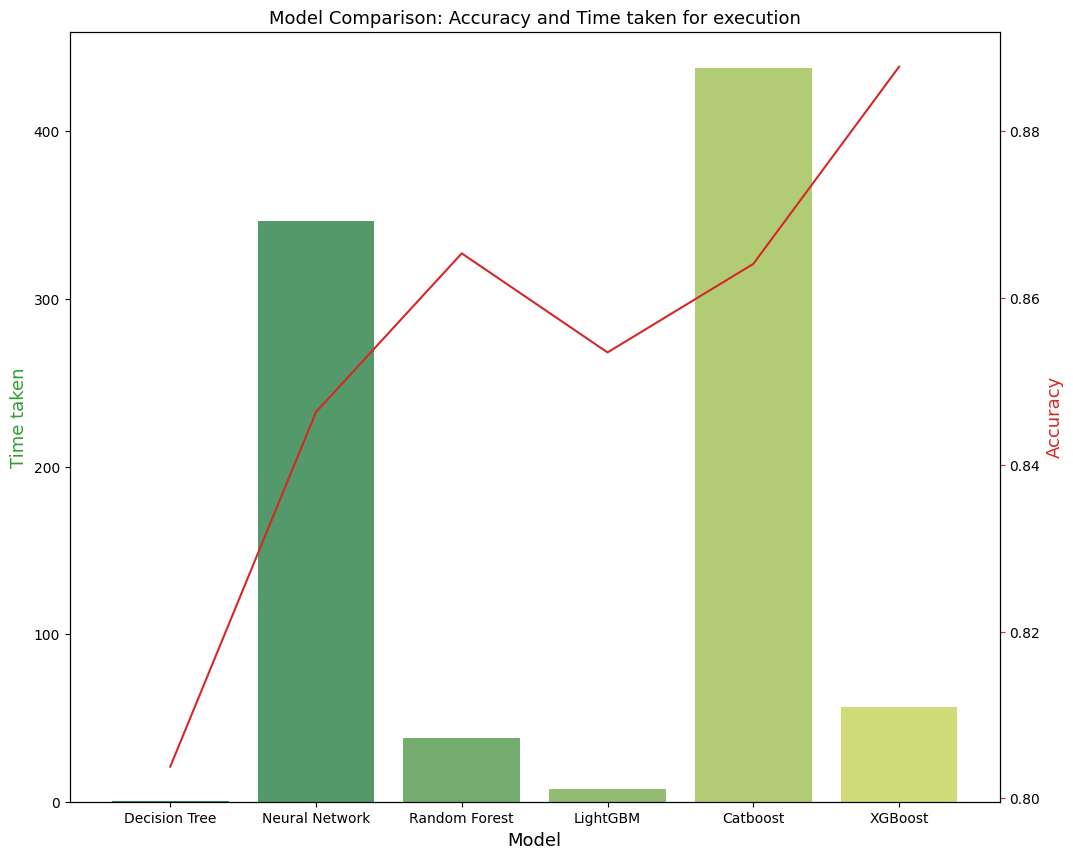

In [77]:
accuracy_scores = [accuracy_dt, accuracy_nn, accuracy_rf, accuracy_lgb, accuracy_cb, accuracy_xgb]
roc_auc_scores = [roc_auc_dt, roc_auc_nn, roc_auc_rf, roc_auc_lgb, roc_auc_cb, roc_auc_xgb]
tt = [tt_dt, tt_nn, tt_rf, tt_lgb, tt_cb, tt_xgb]

model_data = {'Model': ['Decision Tree','Neural Network','Random Forest','LightGBM','Catboost','XGBoost'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

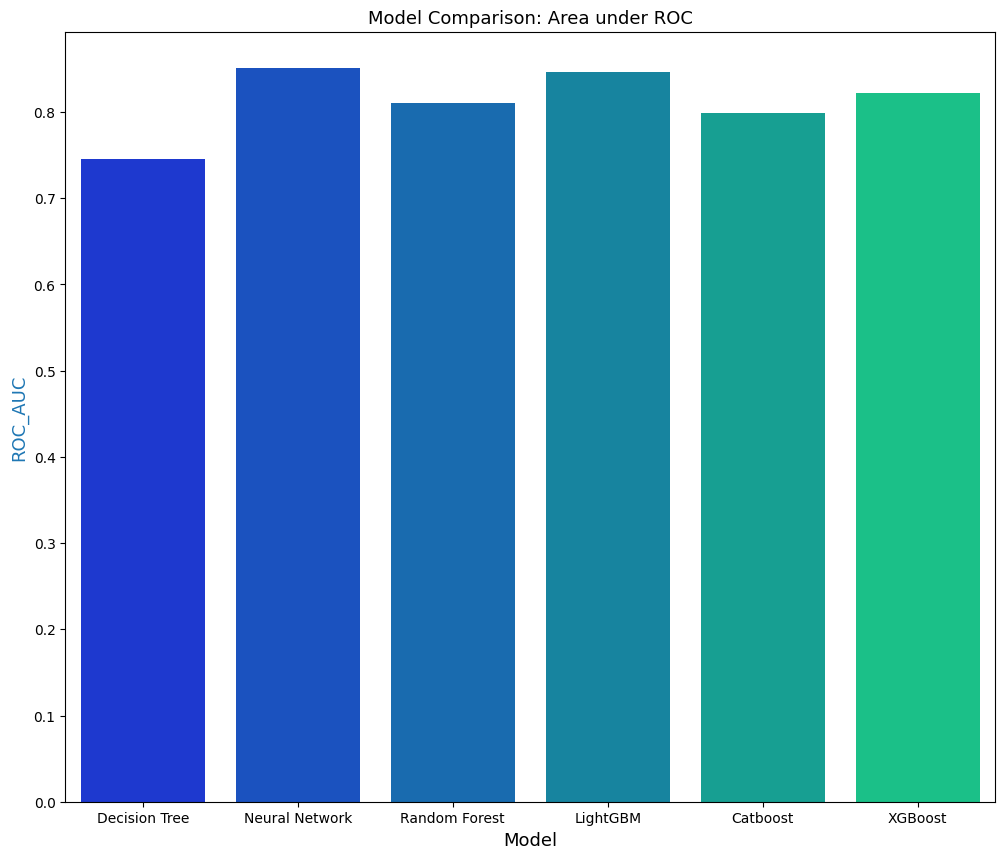

In [78]:
fig, ax3 = plt.subplots(figsize=(12,10))
ax3.set_title('Model Comparison: Area under ROC', fontsize=13)
color = 'tab:blue'
ax3.set_xlabel('Model', fontsize=13)
ax3.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax4 = sns.barplot(x='Model', y='ROC_AUC', data = data, palette='winter')
ax3.tick_params(axis='y')
color = 'tab:red'
plt.show()

# Conclusion
We can observe that **XGBoost and Random Forest** have performed better compared to other models. However, if speed is an important thing to consider, we can stick to Random Forest instead of XGBoost.